In [1]:
#heart disease prediction
#logistic regression model for binary classification

In [2]:
#importing the dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# data collection and processing

df = pd.read_csv(r"heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
# getting info about data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [8]:
df['Sex'] = df['Sex'].map({'M':0,"F":1})

In [9]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [10]:
df['ChestPainType']=df['ChestPainType'].map({'ASY':0,'NAP':1,'ATA':2,'TA':3})

In [11]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [12]:
df['RestingECG']=df['RestingECG'].map({'Normal':0,'LVH':1,'ST':2})

In [13]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [14]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0,"Y":1})

In [15]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [16]:
df['ST_Slope']=df['ST_Slope'].map({'Flat':0,'Up':1,'Down':2})

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,0,1
914,68,0,0,144,193,1,0,141,0,3.4,0,1
915,57,0,0,130,131,0,0,115,1,1.2,0,1
916,57,1,2,130,236,0,1,174,0,0.0,0,1


In [18]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,-0.055750,1.000000,0.168254,-0.005133,0.200092,-0.120076,-0.038320,0.189186,-0.190664,-0.105734,0.066831,-0.305445
ChestPainType,-0.165896,0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.202675,-0.471354
RestingBP,0.254399,-0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,-0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.210498,-0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.019403,0.107628
MaxHR,-0.382045,0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,-0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.097323,0.403951


In [19]:
import seaborn as sns

<Axes: >

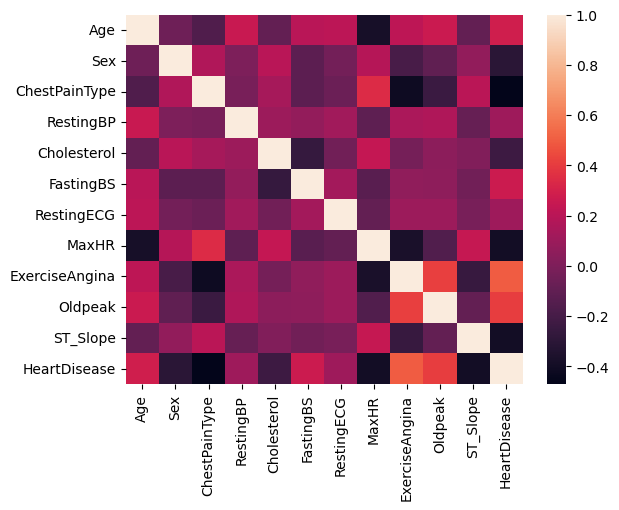

In [20]:
sns.heatmap(df.corr())

In [21]:
#checking the distribution of target variable

df['HeartDisease'].value_counts()
# distribution is almost similar

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [22]:
#splitting the features and target

X=df.drop(columns='HeartDisease', axis=1)
y=df['HeartDisease']
print(X)
print(y)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              2        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              2        130          283          0           2   
3     48    1              0        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              0        144          193          1           0   
915   57    0              0        130          131          0           0   
916   57    1              2        130          236          0           1   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [23]:
#splitting the data into training and test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

#same proportion of 1s and 0s as in the original data

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(734, 11) (184, 11) (734,) (184,)


In [25]:
#train the machine learning model with Logistic regression

model=LogisticRegression()

In [26]:
#train the logistic regression model with training data - model learning
model.fit(X_train,y_train) # will find the pattern and relationship between the features and the target

C:\Users\onita\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
#model evaluation with accuracy score

#accuracy on training data

X_train_prediction=model.predict(X_train)  #give X_train data and tell the model to predict the y_train values
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.8664850136239782


In [28]:
#accuracy on test data

X_test_prediction=model.predict(X_test)  #give X_test data and tell the model to predict the y_train values
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print("Accuracy on test data:", test_data_accuracy)

Accuracy on test data: 0.8478260869565217


In [29]:
#overfitting - overdependent on the training data
#slight case of overfitting, since accuracy of test data is more than accuracy of training data. 
#If the difference is more than 0.05, then have to fix it

In [30]:
#building a predictive system

input_data=(49,1,1,160,180,0,0,156,0,1.0,0) #in the form of tuple

#change the input data to a numpy array
input_data_numpyarray=np.asarray(input_data)

#reshaping array - need to find the prediction for only one instance
inputdata_reshape=input_data_numpyarray.reshape(1,-1)

prediction=model.predict(inputdata_reshape)
print(prediction)

if(prediction==0):
    print("The patient does not have a heart disease")
else:
    print("The patient has a heart disease")

[0]
The patient does not have a heart disease


C:\Users\onita\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
#building a predictive system

input_data=(48,1,0,138,214,0,0,108,1,1.5,0) #in the form of tuple

#change the input data to a numpy array
input_data_numpyarray=np.asarray(input_data)

#reshaping array - need to find the prediction for only one instance
inputdata_reshape=input_data_numpyarray.reshape(1,-1)

prediction=model.predict(inputdata_reshape)
print(prediction)

if(prediction==0):
    print("The patient does not have a heart disease")
else:
    print("The patient has a heart disease")

[1]
The patient has a heart disease


C:\Users\onita\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
